In [1]:
#Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

import matplotlib
sns.set_style("darkgrid")

# Some examples of genomes and metagenomes completeness 

In [35]:
#df=pd.read_table("Data/completeness_genomes.tab",index_col=0)
#df_met=pd.read_table("Data/completeness_met.tab", index_col=0)

df=pd.read_table("Data/genomes_heatmap.tab",index_col=0)
df_met=pd.read_table("Data/metagenomes_heatmap.tab", index_col=0)

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


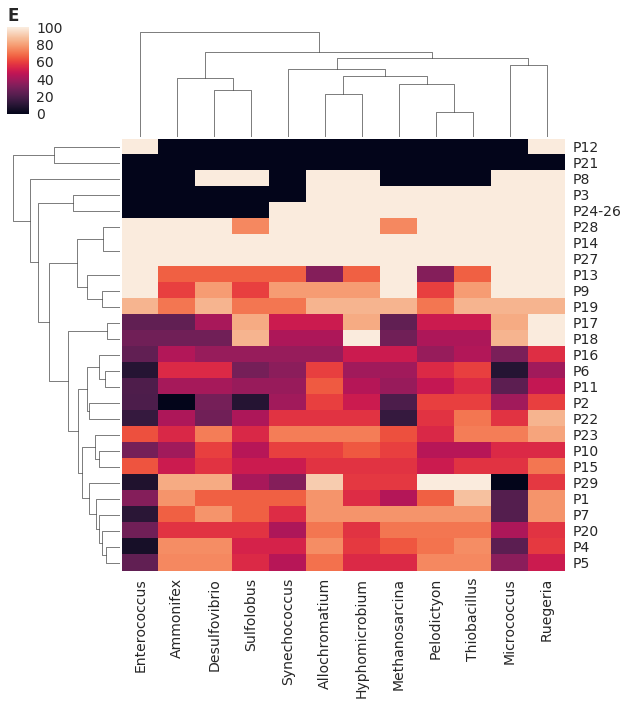

In [36]:
sns.set(font_scale=1.4)
axs = sns.clustermap(df)
sand = plt.setp(axs.ax_heatmap.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.title("E", loc="left", weight='bold')
plt.savefig("Figures/heatmap_genomes.png",bbox_inches='tight', dpi=500)

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


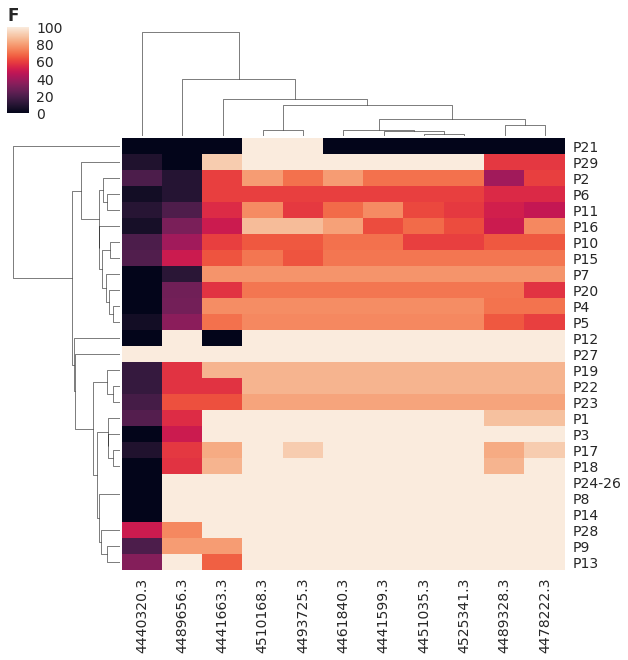

In [37]:
sns.set(font_scale=1.4)
axs = sns.clustermap(df_met)
sand = plt.setp(axs.ax_heatmap.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.title("F", loc="left", weight='bold')
plt.savefig("Figures/heatmap_metagenomes.png",bbox_inches='tight', dpi=500)

# Values of completeness in 2,107 genomes (Gen) and 935 metagenomes (Met)

#### Read data 

In [23]:
#df_Gen=pd.read_table("Data/Gen_completeness.tab",index_col=0)
#df_Met=pd.read_excel("Data/Met_completeness_private.xlsx",index_col=0)
df_Gen=pd.read_table("Data/Supplementary_Table_S11.tab",index_col=0)
df_Met=pd.read_table("Data/Supplementary_Table_S12.tab",index_col=0)

#### Compute statistics 

In [21]:
df_Gen.describe().to_csv("Statistics/df_gen.describe2.tab", sep="\t")
df_Met.describe().to_csv("Statistics/df_men.describe2.tab", sep="\t")

#### Select only the columns belonging to metabolic pathways in both df 

In [25]:
df_Gen_plot=df_Gen[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24-26',  'P27','P28',
       'P29']]
df_Met_plot=df_Met[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24-26',  'P27','P28',
       'P29']]

#### Visualization  

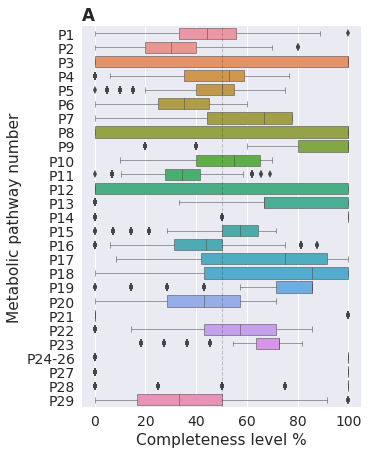

In [26]:
fig = plt.figure(figsize=(5,7))
sns.boxplot(orient="h", data=df_Gen_plot, linewidth=0.5)
plt.xlabel("Completeness level %", )
plt.ylabel("Metabolic pathway number" )
plt.title("A", loc="left", weight='bold')
plt.axvline(50,  color='black', linewidth=1, ls='--', alpha = 0.2)
plt.savefig("Figures/Completeness_Gen_boxplot.png",bbox_inches='tight', dpi=500)

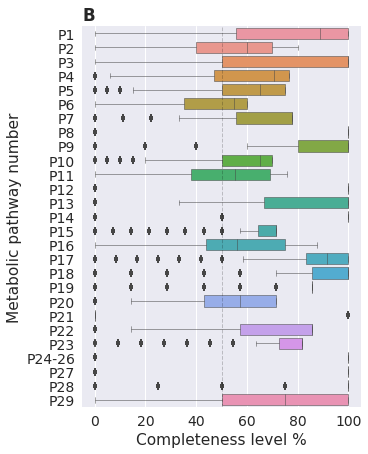

In [27]:
fig = plt.figure(figsize=(5,7))
sns.boxplot(orient="h", data=df_Met_plot, linewidth=0.5)
plt.xlabel("Completeness level %", )
plt.ylabel("Metabolic pathway number" )
plt.title("B", loc="left", weight='bold')
plt.axvline(50,  color='black', linewidth=1, ls='--', alpha = 0.2)
plt.savefig("Figures/Completeness_Met_boxplot.png",bbox_inches='tight', dpi=500)

####  Select coluns to compute pairwise linear regresions 

In [28]:
columns = ['MEBS_SS', 'Comp_mean', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24-26',  'P27','P28',
       'P29']

indices = np.tril_indices(len(columns), k=-1)

In [29]:
def plot_reg(x_label, y_label, df, color=None):
    """Easy function to plot the regression of two
    variabels in a df and to draw the values of the 
    analysis. Uses seaborn module and scipy.stats.
    
    Parameters:
    ============
    
    - x_label: string.
               Name of the column in df to plot in x
    - y_label: string
               Name fo the column in df to plot in y
    - df: Pandas DataFrame
    - color: scatter color"""
    # - Calculate linear regression
    reg = stats.linregress(df[x_label], df[y_label])
    # - plot data
    g = sns.regplot(x_label, y_label, data=df, 
                    truncate=True,
                    scatter_kws={'alpha':0.4})
    # - Annotate de regression values
    s = "$r^2 = {:.3}$\n".format(reg.rvalue**2) +\
        "$p-value_r = {:.2}$\n".format(reg.pvalue) +\
        "Model: $y = {:.2}x +{:.2}$".format(reg.slope, reg.intercept)
    plt.annotate(s=s, 
                 xy=(.05, .75), 
                 bbox=dict(boxstyle="round", fc="w"),
                 xycoords='axes fraction')
    return g, reg

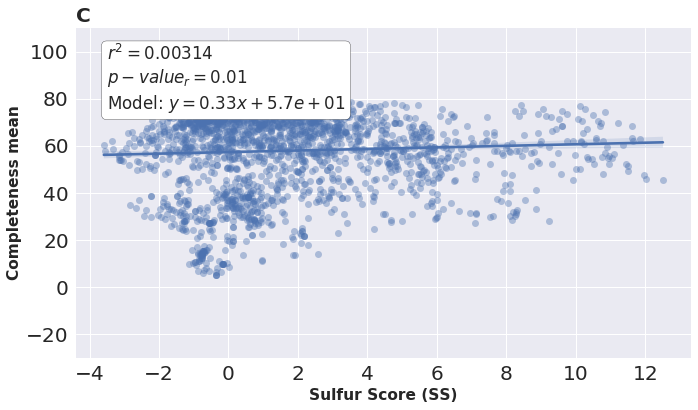

In [31]:
fig = plt.figure(figsize=(10,6))
x= 'MEBS_SS'
y = 'Comp_mean'
plt.xticks(size='large')
plt.yticks(size='large')
plot_reg(x, y, df_Gen)
plt.ylabel("Completeness mean", weight='bold')
plt.xlabel("Sulfur Score (SS)", weight='bold')
plt.title("C",loc='left', weight='bold', size='large')
plt.ylim([-30,110])
plt.tight_layout()
plt.savefig('Figures/{}_vs_{}_gen.png'.format(x,y),bbox_inches='tight', dpi=500)

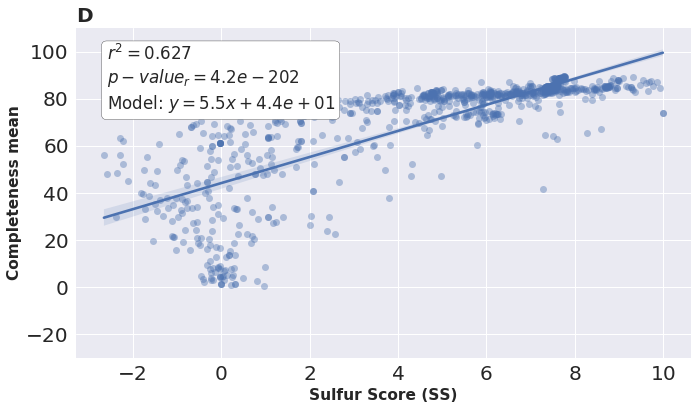

In [32]:
fig = plt.figure(figsize=(10,6))
plt.xticks(size='large')
plt.yticks(size='large')
x= 'MEBS_SS'
y = 'Comp_mean'
plot_reg(x, y, df_Met)
plt.ylabel("Completeness mean", weight='bold')
plt.xlabel("Sulfur Score (SS)", weight='bold')
plt.title("D",loc='left', weight='bold', size='large')
plt.ylim([-30,110])
plt.tight_layout()
plt.savefig('Figures/{}_vs_{}_met.png'.format(x,y),bbox_inches='tight', dpi=500)

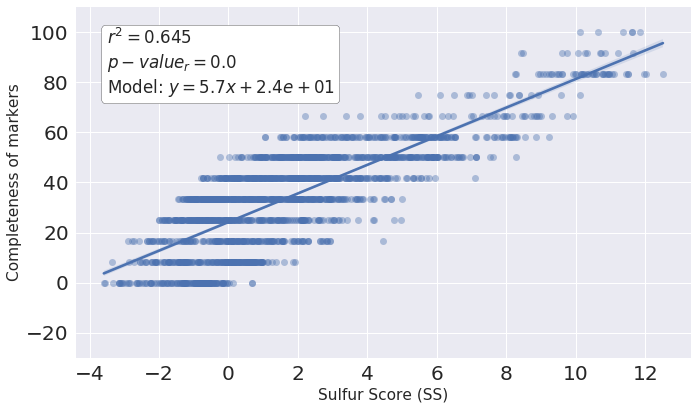

In [39]:
fig = plt.figure(figsize=(10,6))
plt.xticks(size='large')
plt.yticks(size='large')
x= 'MEBS_SS'
y = 'P29'

with sns.axes_style("darkgrid"):
    plot_reg(x, y, df_Gen)
    plt.tight_layout()

plt.ylabel("Completeness of markers")
plt.xlabel("Sulfur Score (SS)")
plt.ylim([-30,110])
plt.tight_layout()
plt.savefig('Figures/{}_vs_{}_gen.png'.format(x,y), bbox_inches='tight', dpi=500)

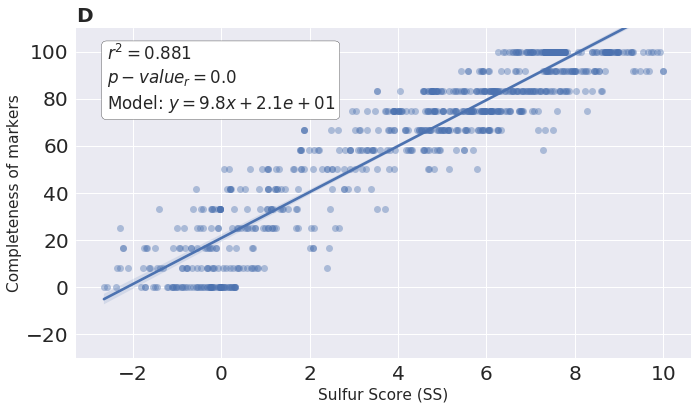

In [40]:
fig = plt.figure(figsize=(10,6))
plt.xticks(size='large')
plt.yticks(size='large')

x= 'MEBS_SS'
y = 'P29'

with sns.axes_style("darkgrid"):
    plot_reg(x, y, df_Met)
    plt.tight_layout()

plt.ylabel("Completeness of markers")
plt.xlabel("Sulfur Score (SS)")
plt.title("D",loc='left', weight='bold', size='large')
plt.ylim([-30,110])
plt.tight_layout()
plt.savefig('Figures/{}_vs_{}_met.png'.format(x,y), bbox_inches='tight', dpi=500)

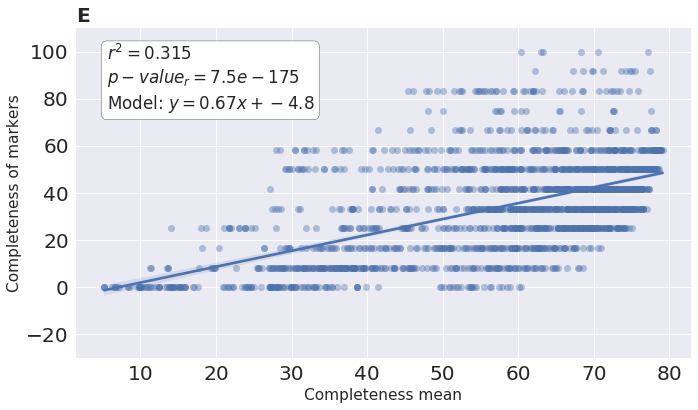

In [41]:
fig = plt.figure(figsize=(10,6))
plt.xticks(size='large')
plt.yticks(size='large')

x= 'Comp_mean'
y = 'P29'

with sns.axes_style("darkgrid"):
    plot_reg(x, y, df_Gen)
    plt.tight_layout()
plt.ylabel("Completeness of markers")
plt.xlabel("Completeness mean")
plt.title("E",loc='left', weight='bold', size='large')
plt.ylim([-30,110])
plt.tight_layout()
plt.savefig('Figures/{}_vs_{}_gen.png'.format(x,y), bbox_inches='tight', dpi=500)

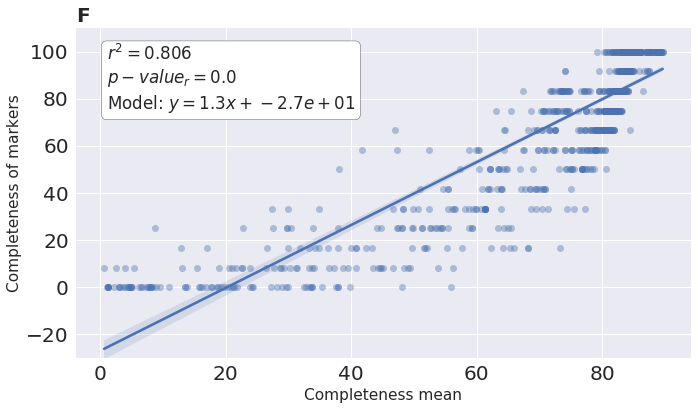

In [42]:
fig = plt.figure(figsize=(10,6))
plt.xticks(size='large')
plt.yticks(size='large')

x= 'Comp_mean'
y = 'P29'

with sns.axes_style("darkgrid"):
    plot_reg(x, y, df_Met)
    plt.tight_layout()
plt.ylabel("Completeness of markers")
plt.xlabel("Completeness mean")
plt.title("F",loc='left', weight='bold', size='large')
plt.ylim([-30,110])
plt.tight_layout()
plt.savefig('Figures/{}_vs_{}_met.png'.format(x,y), bbox_inches='tight', dpi=500)

# Paiwise comparision for the entire dataset 

In [43]:
for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    reg = stats.linregress(df_Gen[col1], df_Gen[col2])
    print("{:<15}vs {:<15}r-value = {:.4}".format(col1, col2, reg.rvalue**2))

Comp_mean      vs MEBS_SS        r-value = 0.003144
P1             vs MEBS_SS        r-value = 0.1869
P1             vs Comp_mean      r-value = 0.3827
P2             vs MEBS_SS        r-value = 0.000511
P2             vs Comp_mean      r-value = 0.5047
P2             vs P1             r-value = 0.2463
P3             vs MEBS_SS        r-value = 0.002406
P3             vs Comp_mean      r-value = 0.3443
P3             vs P1             r-value = 0.09135
P3             vs P2             r-value = 0.1388
P4             vs MEBS_SS        r-value = 0.2675
P4             vs Comp_mean      r-value = 0.6143
P4             vs P1             r-value = 0.383
P4             vs P2             r-value = 0.2277
P4             vs P3             r-value = 0.2058
P5             vs MEBS_SS        r-value = 0.2285
P5             vs Comp_mean      r-value = 0.5793
P5             vs P1             r-value = 0.3967
P5             vs P2             r-value = 0.2292
P5             vs P3             r-value = 0

P29            vs Comp_mean      r-value = 0.3145
P29            vs P1             r-value = 0.3927
P29            vs P2             r-value = 0.1419
P29            vs P3             r-value = 0.08247
P29            vs P4             r-value = 0.7062
P29            vs P5             r-value = 0.5857
P29            vs P6             r-value = 0.7733
P29            vs P7             r-value = 0.6178
P29            vs P8             r-value = 0.06138
P29            vs P9             r-value = 0.06555
P29            vs P10            r-value = 0.2479
P29            vs P11            r-value = 0.5432
P29            vs P12            r-value = 0.03315
P29            vs P13            r-value = 0.05591
P29            vs P14            r-value = 0.118
P29            vs P15            r-value = 0.1482
P29            vs P16            r-value = 0.3639
P29            vs P17            r-value = 0.07622
P29            vs P18            r-value = 0.06792
P29            vs P19            r-value = 0

In [44]:
for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    reg = stats.linregress(df_Met[col1], df_Met[col2])
    print("{:<15}vs {:<15}r-value = {:.4}".format(col1, col2, reg.rvalue**2))

Comp_mean      vs MEBS_SS        r-value = 0.6272
P1             vs MEBS_SS        r-value = 0.747
P1             vs Comp_mean      r-value = 0.8638
P2             vs MEBS_SS        r-value = 0.6522
P2             vs Comp_mean      r-value = 0.7937
P2             vs P1             r-value = 0.7831
P3             vs MEBS_SS        r-value = 0.3638
P3             vs Comp_mean      r-value = 0.5618
P3             vs P1             r-value = 0.4981
P3             vs P2             r-value = 0.4826
P4             vs MEBS_SS        r-value = 0.779
P4             vs Comp_mean      r-value = 0.9005
P4             vs P1             r-value = 0.8387
P4             vs P2             r-value = 0.7855
P4             vs P3             r-value = 0.509
P5             vs MEBS_SS        r-value = 0.7842
P5             vs Comp_mean      r-value = 0.8953
P5             vs P1             r-value = 0.8544
P5             vs P2             r-value = 0.7618
P5             vs P3             r-value = 0.4781
P5 

P29            vs P3             r-value = 0.4151
P29            vs P4             r-value = 0.8752
P29            vs P5             r-value = 0.8825
P29            vs P6             r-value = 0.8961
P29            vs P7             r-value = 0.7831
P29            vs P8             r-value = 0.4907
P29            vs P9             r-value = 0.6116
P29            vs P10            r-value = 0.7719
P29            vs P11            r-value = 0.8471
P29            vs P12            r-value = 0.4567
P29            vs P13            r-value = 0.5383
P29            vs P14            r-value = 0.352
P29            vs P15            r-value = 0.6093
P29            vs P16            r-value = 0.8088
P29            vs P17            r-value = 0.6214
P29            vs P18            r-value = 0.5603
P29            vs P19            r-value = 0.5068
P29            vs P20            r-value = 0.7709
P29            vs P21            r-value = 0.06605
P29            vs P22            r-value = 0.6876
